In [72]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.utils import to_categorical

import random

# Constants

In [110]:
epochs = 5
WIDTH=300
HEIGHT=300
IMAGE_SIZE=(WIDTH, HEIGHT)
IMAGE_CHANNELS=3
batch_size = 12
# Dropout rate
d = 0.3

START_EPOCH = 0.00001

In [ ]:
pip install py7zr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.7/66.7 kB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 16.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 412.3/412.3 kB 25.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.8/138.8 kB 17.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.8/49.8 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 37.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.1/93.1 kB 10.0 MB/s eta 0:00:00


In [111]:
import py7zr
with py7zr.SevenZipFile('../content/drive/MyDrive/UnSortedWaste.7z', mode='r') as z:
    z.extractall()
path = '../content/UnSortedWaste'

filenames = os.listdir(path)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
filenames

['glass200.jpg',
 'cardboard94.jpg',
 'glass76.jpg',
 'plastic474.jpg',
 'paper419.jpg',
 'paper584.jpg',
 'plastic300.jpg',
 'metal311.jpg',
 'cardboard104.jpg',
 'plastic356.jpg',
 'cardboard24.jpg',
 'plastic126.jpg',
 'glass347.jpg',
 'glass381.jpg',
 'paper262.jpg',
 'plastic262.jpg',
 'paper242.jpg',
 'glass418.jpg',
 'paper334.jpg',
 'paper117.jpg',
 'metal286.jpg',
 'paper98.jpg',
 'plastic62.jpg',
 'cardboard53.jpg',
 'metal219.jpg',
 'metal164.jpg',
 'metal257.jpg',
 'metal283.jpg',
 'plastic261.jpg',
 'paper191.jpg',
 'plastic318.jpg',
 'metal31.jpg',
 'metal330.jpg',
 'cardboard147.jpg',
 'plastic286.jpg',
 'cardboard397.jpg',
 'paper49.jpg',
 'cardboard382.jpg',
 'glass188.jpg',
 'plastic103.jpg',
 'glass480.jpg',
 'metal337.jpg',
 'plastic171.jpg',
 'plastic345.jpg',
 'metal292.jpg',
 'metal87.jpg',
 'cardboard122.jpg',
 'metal118.jpg',
 'paper477.jpg',
 'plastic271.jpg',
 'metal22.jpg',
 'cardboard54.jpg',
 'cardboard272.jpg',
 'paper105.jpg',
 'metal345.jpg',
 'glass474

### Creating a df with path and category for each photo

In [112]:
df = pd.DataFrame({
    'filename': [],
    'category': []
})

for filename in filenames:
        category = filename[0:3]
        if category == "car":
            category1 = "cardboard"
        elif category == "gla":
            category1 = "glass"
        elif category == "met":
            category1 = "metal"
        elif category == "pap":
            category1 = "paper"
        elif category == "pla":
            category1 = "plastic"
        else:
            category1 = "other"

        df=df.append({'filename':path +"/"+filename, 'category': category1},ignore_index=True)


Показано результат, скорочений до останніх рядків (5000).
<ipython-input-112-e98c1cead109>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append({'filename':path +"/"+filename, 'category': category1},ignore_index=True)
<ipython-input-112-e98c1cead109>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append({'filename':path +"/"+filename, 'category': category1},ignore_index=True)
<ipython-input-112-e98c1cead109>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append({'filename':path +"/"+filename, 'category': category1},ignore_index=True)
<ipython-input-112-e98c1cead109>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat inst

In [ ]:
df

filename   category
0     /content/cardboard370.jpg  cardboard
1         /content/paper304.jpg      paper
2       /content/plastic151.jpg    plastic
3         /content/paper438.jpg      paper
4          /content/metal75.jpg      metal
...                         ...        ...
2522      /content/glass218.jpg      glass
2523    /content/plastic466.jpg    plastic
2524      /content/glass233.jpg      glass
2525  /content/cardboard308.jpg  cardboard
2526       /content/metal13.jpg      metal

[2527 rows x 2 columns]

### Devide into training testing and visualize

In [113]:
df_train=df.sample(frac=0.8,replace=False)

df_valid=df.drop(df_train.index.values)

paper        486
glass        404
plastic      378
metal        325
cardboard    316
other        113
Name: category, dtype: int64


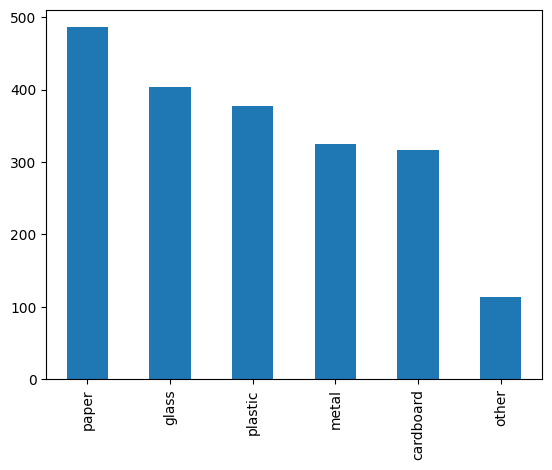

In [114]:
df_train['category'].value_counts().plot.bar()
print (df_train['category'].value_counts())

paper        108
plastic      104
glass         97
cardboard     87
metal         85
other         24
Name: category, dtype: int64


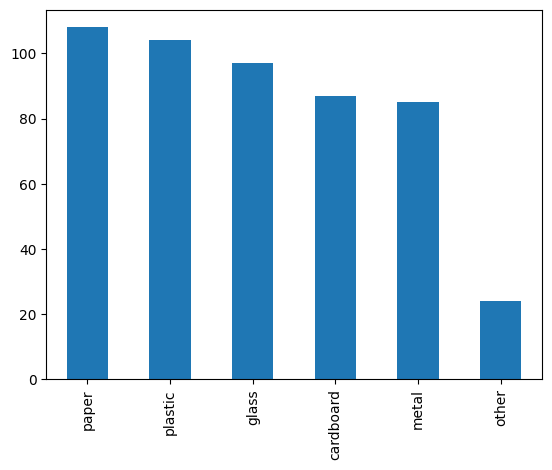

In [115]:
df_valid['category'].value_counts().plot.bar()
print (df_valid['category'].value_counts())

##### the sample of an image from df

plastic18.jpg


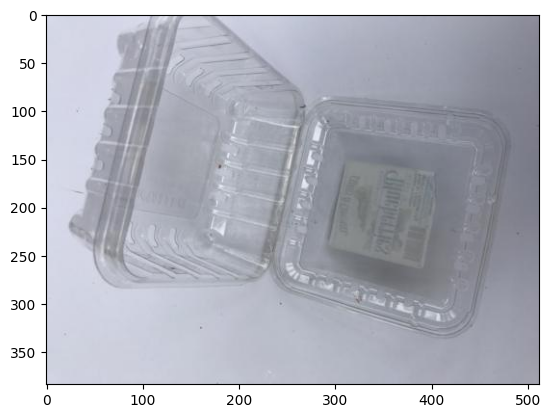

In [116]:
sample = random.choice(filenames)

image = load_img(path + "/"+sample)
plt.imshow(image)
print(sample)

### Building the model

In [117]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, BatchNormalization


model = Sequential([
        #    filters, strides
        Conv2D(16, (2, 2), activation='relu', input_shape=(WIDTH, HEIGHT, IMAGE_CHANNELS)),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2)),

        Conv2D(32, (2, 2), activation='relu'),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2)),

        Conv2D(64, (2, 2), activation='relu',padding='same'),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2)),

        Conv2D(128, (2, 2), activation='relu',padding='same'),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2)),

        Conv2D(128, (2, 2), activation='relu',padding='same'),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2)),


        Flatten(),
        Dense(1024, activation='relu'),
        BatchNormalization(),
        Dropout(d),
        Dense(512, activation='relu'),
        BatchNormalization(),
        Dropout(d),
        Dense(128, activation='relu'),
        BatchNormalization(),
        Dropout(d),
        Dense(6, activation='softmax')# 6 because we have 6 classes
])


model.compile(
    loss='mean_squared_error',
    optimizer='adam',
    metrics = ['accuracy']
)

model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_40 (Conv2D)          (None, 299, 299, 16)      208       
                                                                 
 batch_normalization_67 (Bat  (None, 299, 299, 16)     64        
 chNormalization)                                                
                                                                 
 max_pooling2d_40 (MaxPoolin  (None, 149, 149, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_41 (Conv2D)          (None, 148, 148, 32)      2080      
                                                                 
 batch_normalization_68 (Bat  (None, 148, 148, 32)     128       
 chNormalization)                                                
                                                      

In [118]:
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler
earlystop = EarlyStopping(patience=10,restore_best_weights=True)

In [120]:
LR_START = 0.00005
LR_MIN = 0.000001
LR_EXP_DECAY = 0.94

# Define a Learning Rate function on epoch that will decrease exponentially.
def lrfn(epoch):
    lr = (LR_START - LR_MIN) * LR_EXP_DECAY**(epoch+START_EPOCH) + LR_MIN
    return lr

lr_callback = LearningRateScheduler(lrfn, verbose=True)



In [121]:
total_train = df_train.shape[0]
total_validate = df_valid.shape[0]

print("Training: {}, Validation: {}".format(total_train,total_validate))

Training: 2022, Validation: 505


In [122]:
train_datagen = ImageDataGenerator(
    rotation_range=15,
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)

train_generator = train_datagen.flow_from_dataframe(
    df_train,
    "",
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=batch_size,
)

Found 2022 validated image filenames belonging to 6 classes.


In [123]:
validation_datagen = ImageDataGenerator(rescale=1./255)

# According to the dataframe, pull images one by one from image directory
validation_generator = validation_datagen.flow_from_dataframe(
    df_valid,
    "",
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=batch_size
)

Found 505 validated image filenames belonging to 6 classes.


In [124]:
history = model.fit(
    # The train generator just tested, can pull training images out from directory.
    train_generator,
    # Batch size and epochs already set at beginning.
    batch_size=batch_size,
    epochs=epochs,
    # The validation generator, can pull validation images out from directory.
    validation_data=validation_generator,

    validation_steps=total_validate//batch_size,
    steps_per_epoch=total_train//batch_size,
    # Two callback methods: early stopping and learning rate scheduling
    callbacks=[earlystop, lr_callback]
)

# Save Model
model.save_weights("model.h5")


Epoch 1: LearningRateScheduler setting learning rate to 4.999996968106156e-05.
Epoch 1/5
168/168 [==============================] - 340s 2s/step - loss: 0.1532 - accuracy: 0.3169 - val_loss: 0.1664 - val_accuracy: 0.1905 - lr: 5.0000e-05

Epoch 2: LearningRateScheduler setting learning rate to 4.705997150019786e-05.
Epoch 2/5
168/168 [==============================] - 338s 2s/step - loss: 0.1294 - accuracy: 0.4294 - val_loss: 0.1351 - val_accuracy: 0.3155 - lr: 4.7060e-05

Epoch 3: LearningRateScheduler setting learning rate to 4.429637321018599e-05.
Epoch 3/5
168/168 [==============================] - 332s 2s/step - loss: 0.1243 - accuracy: 0.4587 - val_loss: 0.1002 - val_accuracy: 0.5476 - lr: 4.4296e-05

Epoch 4: LearningRateScheduler setting learning rate to 4.169859081757483e-05.
Epoch 4/5
168/168 [==============================] - 331s 2s/step - loss: 0.1163 - accuracy: 0.4900 - val_loss: 0.0907 - val_accuracy: 0.6032 - lr: 4.1699e-05

Epoch 5: LearningRateScheduler setting lear

In [105]:
test_df = df.sample(frac = 0.3)
# Number of testing samples
nb_samples = test_df.shape[0]

In [106]:
test_gen = ImageDataGenerator(rescale=1./255)
test_generator = test_gen.flow_from_dataframe(
    test_df,
    "",
    x_col='filename',
    y_col=None,
    class_mode=None,
    target_size=IMAGE_SIZE,
    batch_size=batch_size,
    shuffle=False
)

Found 758 validated image filenames.


In [107]:
predict = model.predict_generator(test_generator, steps=np.ceil(nb_samples/batch_size))

<ipython-input-107-52619fd72ccc>:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predict = model.predict_generator(test_generator, steps=np.ceil(nb_samples/batch_size))


In [108]:
test_df['pred_category'] = np.argmax(predict, axis=-1)

label_map = dict((v,k) for k,v in train_generator.class_indices.items())
test_df['pred_category'] = test_df['pred_category'].replace(label_map)

<Axes: >

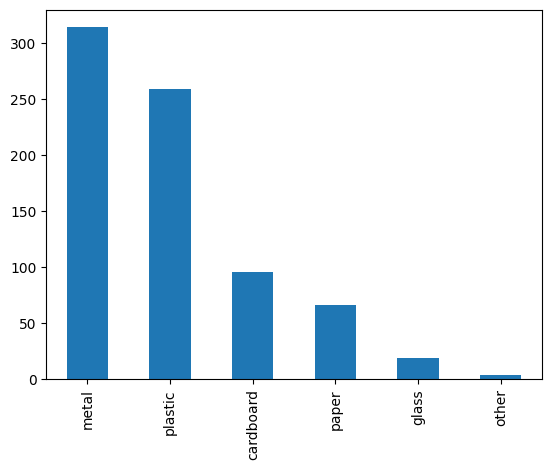

In [109]:
test_df['pred_category'].value_counts().plot.bar()

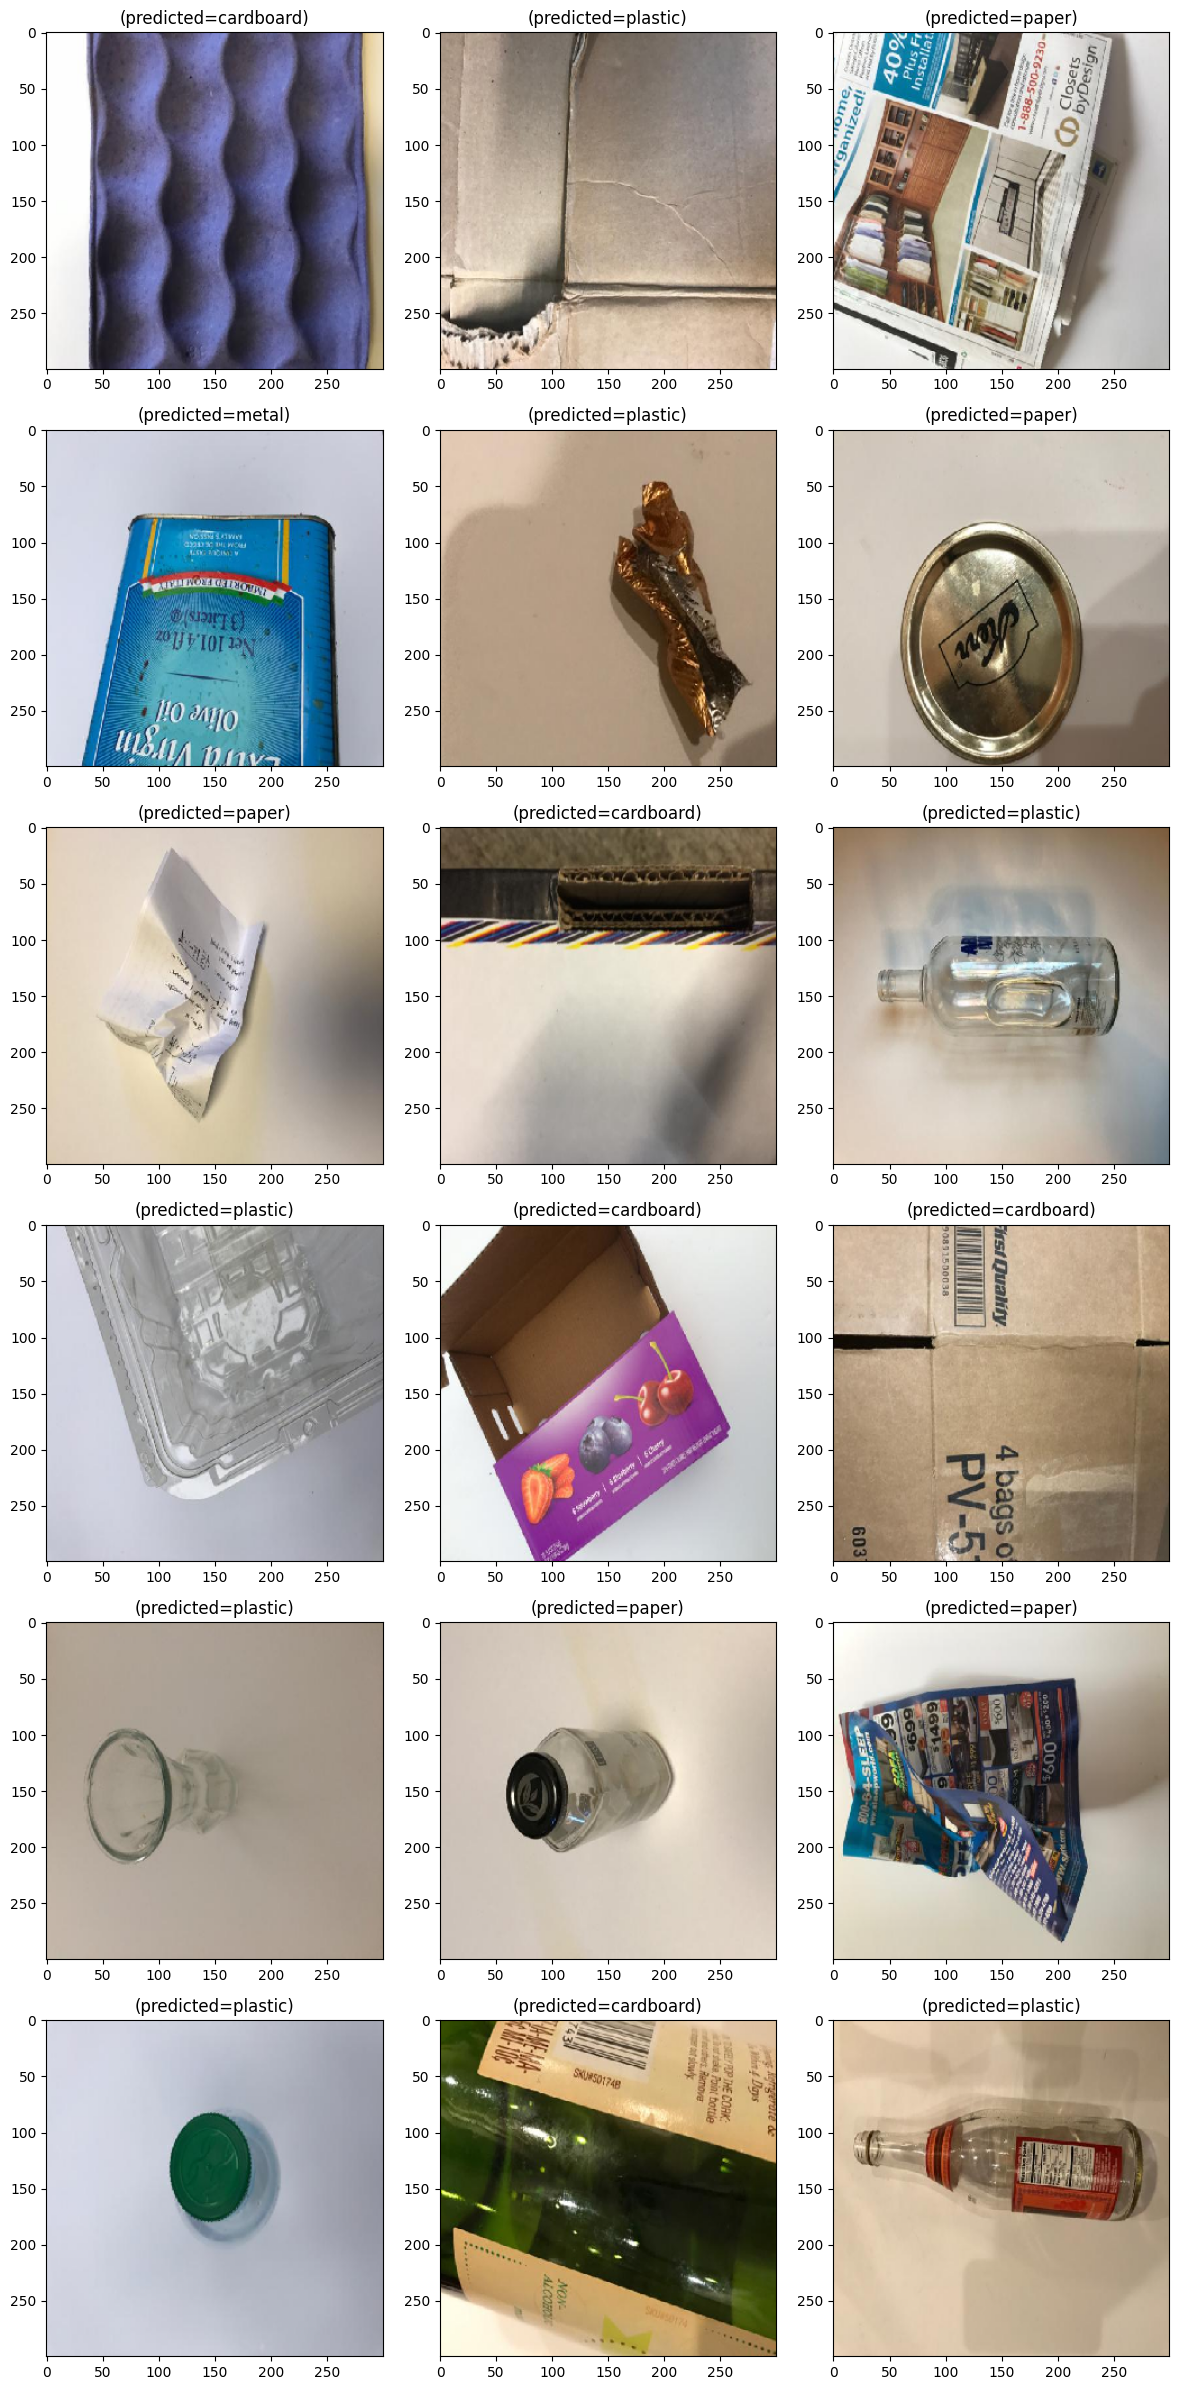

In [ ]:
import matplotlib.pyplot as plt
import matplotlib

sample_test = test_df.sample(n=18)
plt.figure(figsize=(12, 24))

i=1
for index, row in sample_test.iterrows():
    if i <= 18:
        filename = row['filename']
        category = row['pred_category']
        img = load_img(filename, target_size=IMAGE_SIZE)
        plt.subplot(6, 3, i)
        plt.imshow(img)
        plt.title('(predicted=' + "{}".format(category) + ')')
        i+=1
plt.tight_layout()

plt.show()



In [ ]:
submission_df = test_df.copy()
submission_df.to_csv('./submission.csv', index=False)
test_df.head(30)


filename   category pred_category
2260      ../content/UnSortedWaste/metal169.jpg      metal         paper
1771      ../content/UnSortedWaste/metal305.jpg      metal     cardboard
1765      ../content/UnSortedWaste/paper434.jpg      paper         paper
1777       ../content/UnSortedWaste/paper34.jpg      paper         paper
2506      ../content/UnSortedWaste/glass277.jpg      glass         glass
2313      ../content/UnSortedWaste/glass353.jpg      glass     cardboard
2075      ../content/UnSortedWaste/glass222.jpg      glass       plastic
187       ../content/UnSortedWaste/paper192.jpg      paper         paper
824       ../content/UnSortedWaste/paper544.jpg      paper         paper
1616       ../content/UnSortedWaste/trash47.jpg      other         paper
2011      ../content/UnSortedWaste/paper289.jpg      paper         paper
64        ../content/UnSortedWaste/metal353.jpg      metal       plastic
1412  ../content/UnSortedWaste/cardboard265.jpg  cardboard     cardboard
891       ../content/UnSortedWaste/paper144.jpg      paper         paper
284       ../content/UnSortedWaste/metal266.jpg      metal         metal
2175    ../content/UnSortedWaste/plastic188.jpg    plastic       plastic
2292       ../content/UnSortedWaste/glass72.jpg      glass         paper
89        ../content/UnSortedWaste/paper592.jpg      paper         paper
1180      ../content/UnSortedWaste/glass100.jpg      glass         glass
300       ../content/UnSortedWaste/paper293.jpg      paper         paper
281        ../content/UnSortedWaste/trash51.jpg      other         paper
2120      ../content/UnSortedWaste/paper142.jpg      paper         paper
989       ../content/UnSortedWaste/metal315.jpg      metal       plastic
1367    ../content/UnSortedWaste/plastic141.jpg    plastic         paper
1511       ../content/UnSortedWaste/trash72.jpg      other         other
1190    ../content/UnSortedWaste/plastic252.jpg    plastic       plastic
1047    ../content/UnSortedWaste/plastic235.jpg    plastic       plastic
2315      ../content/UnSortedWaste/plastic5.jpg    plastic       plastic
2267      ../content/UnSortedWaste/paper167.jpg      paper         paper
1391  ../content/UnSortedWaste/cardboard160.jpg  cardboard     cardboard

Found 1 validated image filenames belonging to 1 classes.


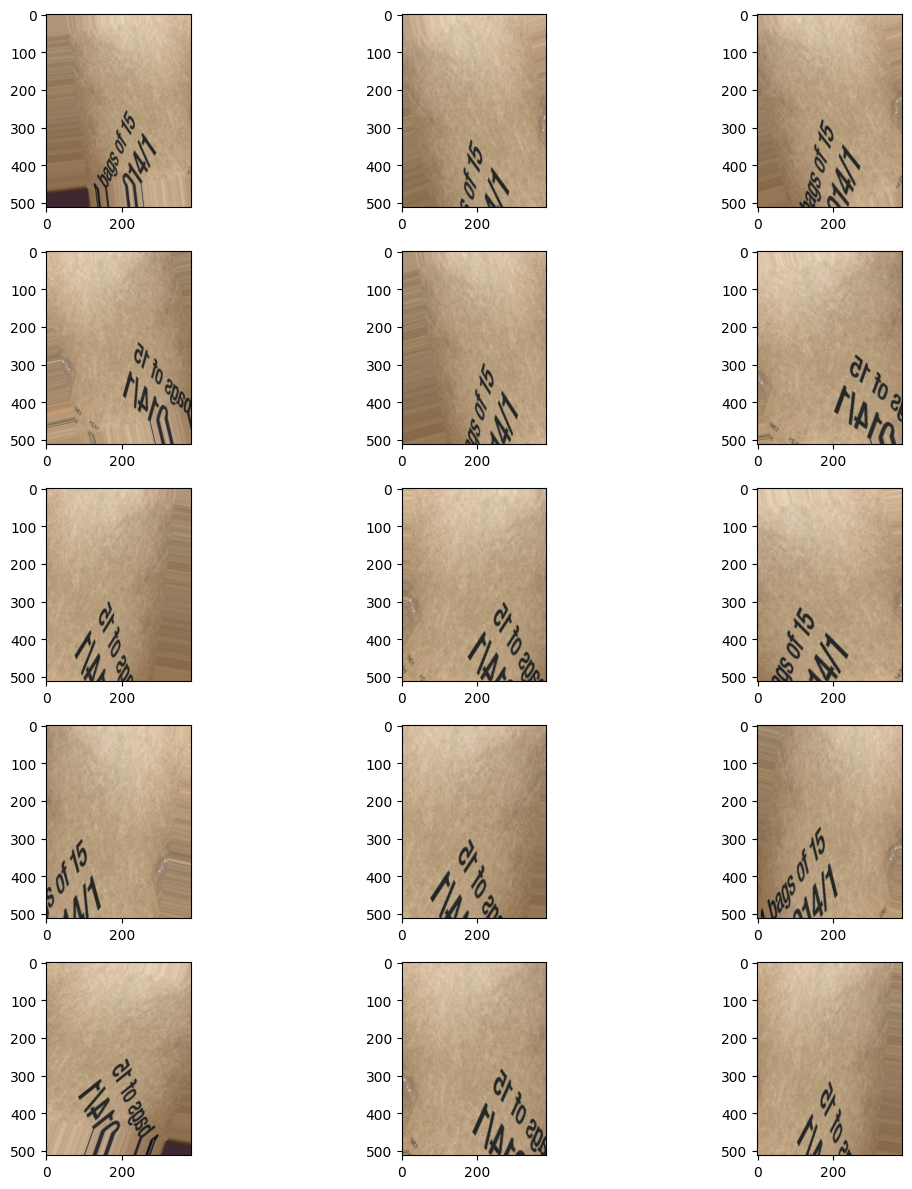

filename   category
0  ../Tensorflow/UnSortedWaste/cardboard92.jpg  cardboard

In [ ]:
example_df = df_train.sample(n=1).reset_index(drop=True)
# Pull the image from directory
example_generator = train_datagen.flow_from_dataframe(
    example_df,
    "",
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical'
)

# Plot the effect of the data augmentation
plt.figure(figsize=(12, 12))
for i in range(0, 15):
    plt.subplot(5, 3, i+1)
    for X_batch, Y_batch in example_generator:
        image = X_batch[0]
        plt.imshow(image)
        break
plt.tight_layout()
plt.show()

example_df